In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import permutation_importance
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Functions

In [41]:
def to_dummy(df, col):

    enc = OneHotEncoder(handle_unknown='ignore')

    temp = pd.DataFrame(
        data=enc.fit_transform(
            df[[col]]
        ).toarray(),
        columns=enc.categories_,
    )
    
    del df[col]
    return pd.concat([df, temp], axis=1)

def model_fit(model, grid_param, train_X, train_Y):
    gd_sr = GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     cv=5,
                     n_jobs=-1)
    gd_sr.fit(train_X, train_Y)
    print('This model best CV score is {0}.\n'.format(gd_sr.best_score_))
    return gd_sr.best_params_, gd_sr.best_score_

def productivity_data(df):
    exist_robots_productivity = df.iloc[:100, -11:]
    for i in range(11):
        fig, ax = plt.subplots()
        ax.hist(
            exist_robots_productivity[exist_robots_productivity.columns[i]], 
            color = 'blue', edgecolor = 'black', bins = 100)
        ax.set_title(exist_robots_productivity.columns[i])
    exist_robots_productivity = to_dummy(exist_robots_productivity, 'Arakyd Vocabulator Model')
    exist_robots_productivity = to_dummy(exist_robots_productivity, 'Axial Piston Model')
    exist_robots_productivity = to_dummy(exist_robots_productivity, 'Nanochip Model')

    X = exist_robots_productivity.loc[:, exist_robots_productivity.columns != 'Productivity'].values
    Y = exist_robots_productivity.Productivity.values
        
    return X, Y

# Example 1

In [ ]:
ex1 = pd.read_csv('./robogame-v0.5/server/example1/examplematch1.robotdata.csv')
X, Y = productivity_data(ex1)
class_Y = [1 if x > 0 else 0 for x in Y] 

In [94]:
# RandomForestRegressor

rfr_grid_param = {
    'n_estimators': [100, 500, 1000, 1500, 2000],
    'criterion': ['squared_error', 'absolute_error'],
}
best_param, best_score = model_fit(RandomForestRegressor(), rfr_grid_param, X, Y)
rfr = RandomForestRegressor(**best_param)

This model best CV score is 0.909493890699214.



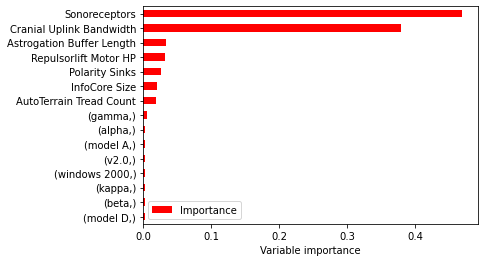

In [81]:
importance = pd.DataFrame({'Importance': rfr.feature_importances_}, 
                          index=transformed_exist_robots.columns[[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15]])
importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable importance')
plt.legend(loc='lower right')
plt.legend()
plt.show()

This model best CV score is -0.44112645842166354.

This model best CV score is -0.4257796531210497.

This model best CV score is -0.34726739727392186.

This model best CV score is 0.32040554652811.

This model best CV score is 0.9103604875976252.

This model best CV score is 0.9104565696197329.

This model best CV score is 0.9122320313034885.

This model best CV score is 0.9101723657010613.

This model best CV score is 0.9110051656108311.

This model best CV score is 0.9095827698998843.

This model best CV score is 0.9101776978506896.

This model best CV score is 0.9109436133749569.



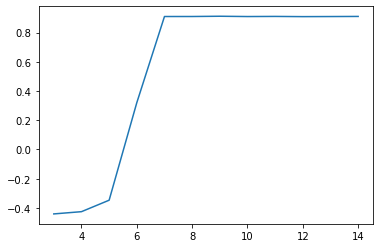

In [137]:
param_num = list(range(3, 15))
score = list()
for num in param_num:
    reduced_X = transformed_exist_robots[importance.index.values[:num]].values
    rfr_grid_param = {
        'n_estimators': [100, 500, 1000, 1500, 2000],
        'criterion': ['squared_error', 'absolute_error'],
    }
    best_param, best_score = model_fit(RandomForestRegressor(), rfr_grid_param, reduced_X, Y)
    score.append(best_score)
plt.plot(param_num, score)

In [141]:
importance.index.values[:7]

array(['Repulsorlift Motor HP', 'Astrogation Buffer Length',
       'Polarity Sinks', 'AutoTerrain Tread Count', 'InfoCore Size',
       'Sonoreceptors', 'Cranial Uplink Bandwidth'], dtype=object)

In [104]:
# SVR

svr_grid_param = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 2, 5]
}
best_param, best_score = model_fit(SVR(), svr_grid_param, X, Y)
svr = SVR(**best_param)

This model best CV score is 0.8364208427941859.



In [113]:
# Tree

tree = DecisionTreeRegressor(max_depth=4, random_state=0).fit(X, Y)
tree_cv = cross_val_score(estimator = tree, X = X, y = Y, cv = 5)
print("Tree CV: ", tree_cv.mean())

Tree CV:  0.6858248344229262


# Classification

In [145]:
class_Y = [1 if x > 0 else 0 for x in Y]

## RFC

In [148]:
rfc_grid_param = {
    'n_estimators': [100, 500, 1000, 1500, 2000],
    'criterion': ['gini', 'entropy'],
}
best_param, best_score = model_fit(RandomForestClassifier(), rfc_grid_param, X, class_Y)
rfc = RandomForestClassifier(**best_param).fit(X, class_Y)

This model best CV score is 0.9399999999999998.



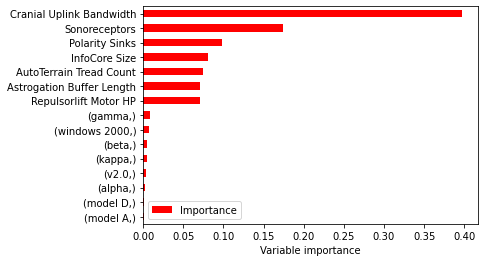

In [216]:
importance = pd.DataFrame({'Importance': rfc.feature_importances_}, 
                          index=transformed_exist_robots.columns[[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15]])
importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable importance')
plt.legend(loc='lower right')
plt.legend()
plt.show()

This model best CV score is 0.77.

This model best CV score is 0.76.

This model best CV score is 0.79.

This model best CV score is 0.79.

This model best CV score is 0.96.

This model best CV score is 0.9399999999999998.

This model best CV score is 0.96.

This model best CV score is 0.96.

This model best CV score is 0.96.

This model best CV score is 0.95.

This model best CV score is 0.96.

This model best CV score is 0.93.



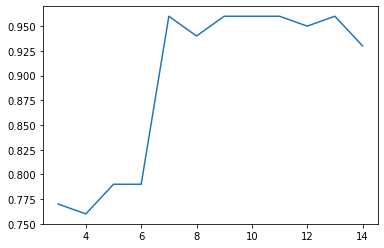

In [185]:
param_num = list(range(3, 15))
score = list()
for num in param_num:
    reduced_X = transformed_exist_robots[importance.index.values[:num]].values
    best_param, best_score = model_fit(RandomForestClassifier(), rfc_grid_param, reduced_X, class_Y)
    score.append(best_score)
plt.plot(param_num, score)

## GNB

In [209]:
GNB = GaussianNB().fit(X, class_Y)
GNB_cv = cross_val_score(estimator = GNB, X = X, y = class_Y, cv = 5)
print("GNB CV: ", GNB_cv.mean())

GNB CV:  0.9


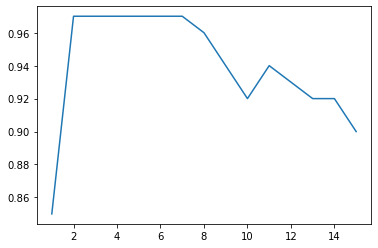

In [210]:
imps = permutation_importance(GNB, X, class_Y)

param_num = list(range(-15, 0))
score = list()
for num in param_num:
    reduced_X = X[:,np.argsort(imps.importances_mean)[num:]]
    GNB = GaussianNB().fit(reduced_X, class_Y)
    GNB_cv = cross_val_score(estimator = GNB, X = reduced_X, y = class_Y, cv = 5)
    score.append(GNB_cv.mean())
plt.plot(np.abs(param_num), score)

In [215]:
reduced_X = X[:,np.argsort(imps.importances_mean)[-2:]]
GNB = GaussianNB().fit(reduced_X, class_Y)
GNB_cv = cross_val_score(estimator = GNB, X = reduced_X, y = class_Y, cv = 5)
GNB_cv.mean()

0.97

## LDA

In [218]:
lda = LinearDiscriminantAnalysis().fit(X, class_Y)
lda_cv = cross_val_score(estimator = lda, X = X, y = class_Y, cv = 5)
print("LDA CV: ", lda_cv.mean())

LDA CV:  0.95


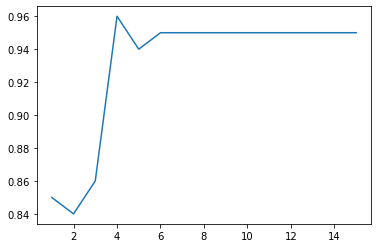

In [219]:
imps = permutation_importance(lda, X, class_Y)

param_num = list(range(-15, 0))
score = list()
for num in param_num:
    reduced_X = X[:,np.argsort(imps.importances_mean)[num:]]
    lda = LinearDiscriminantAnalysis().fit(reduced_X, class_Y)
    lda_cv = cross_val_score(estimator = lda, X = reduced_X, y = class_Y, cv = 5)
    score.append(lda_cv.mean())
plt.plot(np.abs(param_num), score)

# Example 2

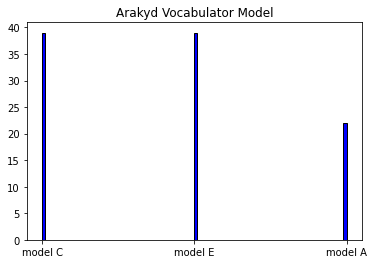

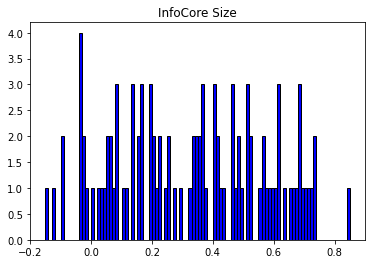

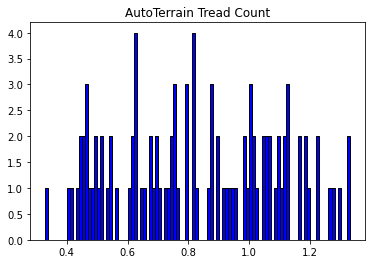

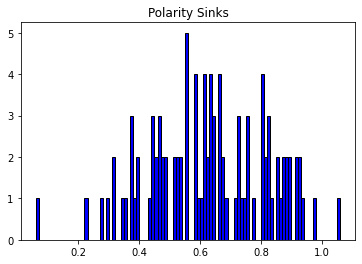

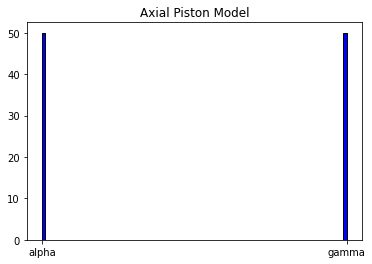

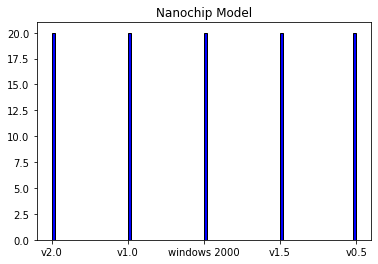

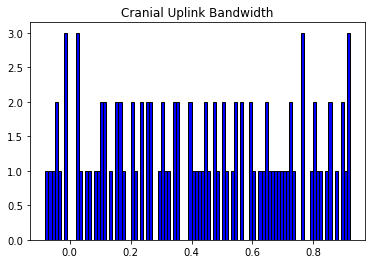

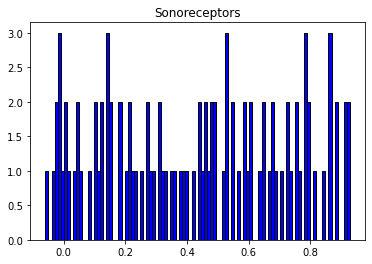

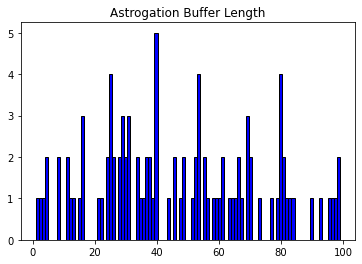

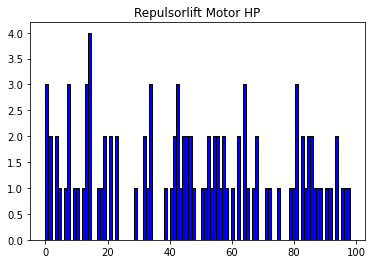

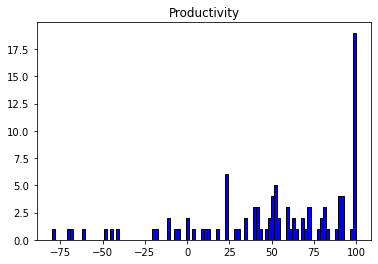

In [261]:
ex2 = pd.read_csv('./robogame-v0.5/server/example2/examplematch2.robotdata.csv')
X, Y = productivity_data(ex2)
class_Y = [1 if x > 0 else 0 for x in Y] 


In [245]:
GNB = GaussianNB().fit(X, class_Y)
GNB_cv = cross_val_score(estimator = GNB, X = X, y = class_Y, cv = 5)
print("GNB CV: ", GNB_cv.mean())

GNB CV:  0.9199999999999999


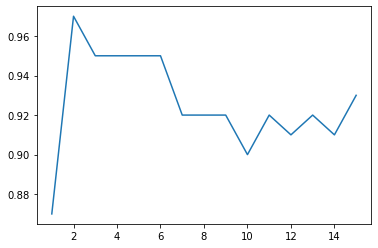

In [246]:
imps = permutation_importance(GNB, X, class_Y)

param_num = list(range(-15, 0))
score = list()
for num in param_num:
    reduced_X = X[:,np.argsort(imps.importances_mean)[num:]]
    GNB = GaussianNB().fit(reduced_X, class_Y)
    GNB_cv = cross_val_score(estimator = GNB, X = reduced_X, y = class_Y, cv = 5)
    score.append(GNB_cv.mean())
plt.plot(np.abs(param_num), score)

In [247]:
reduced_X = X[:,np.argsort(imps.importances_mean)[-2:]]
GNB = GaussianNB().fit(reduced_X, class_Y)
GNB_cv = cross_val_score(estimator = GNB, X = reduced_X, y = class_Y, cv = 5)
GNB_cv.mean()

0.97

In [253]:
np.argsort(imps.importances_mean)[-2:]

array([5, 6])

# Example 3

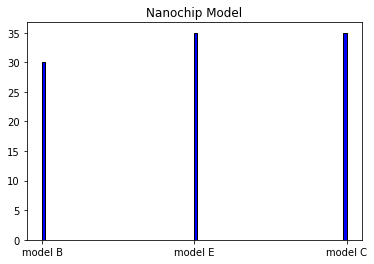

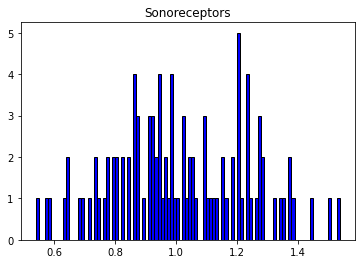

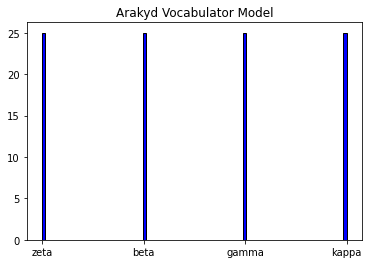

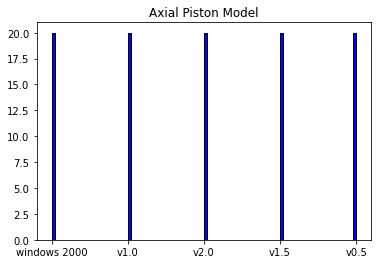

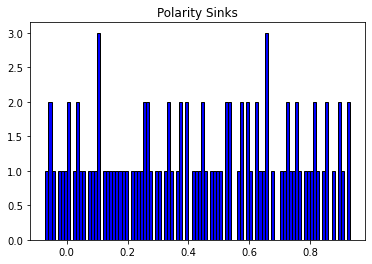

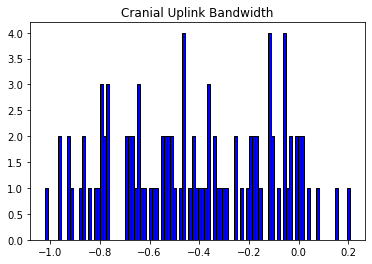

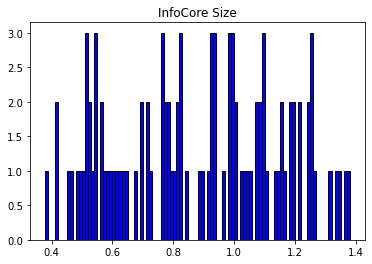

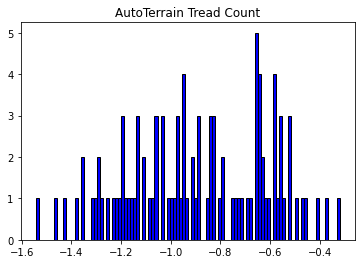

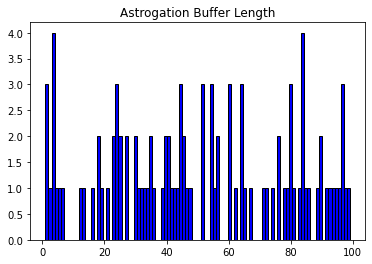

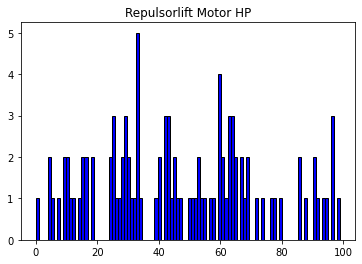

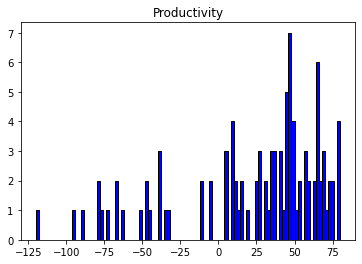

In [262]:
ex3 = pd.read_csv('./robogame-v0.5/server/example3/examplematch3.robotdata.csv')
X, Y = productivity_data(ex3)
class_Y = [1 if x > 0 else 0 for x in Y] 


In [263]:
GNB = GaussianNB().fit(X, class_Y)
GNB_cv = cross_val_score(estimator = GNB, X = X, y = class_Y, cv = 5)
print("GNB CV: ", GNB_cv.mean())

GNB CV:  0.76


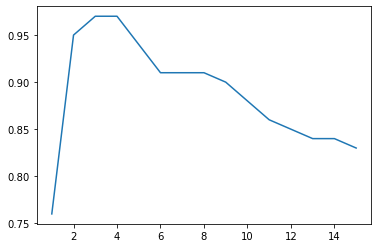

In [264]:
imps = permutation_importance(GNB, X, class_Y)

param_num = list(range(-15, 0))
score = list()
for num in param_num:
    reduced_X = X[:,np.argsort(imps.importances_mean)[num:]]
    GNB = GaussianNB().fit(reduced_X, class_Y)
    GNB_cv = cross_val_score(estimator = GNB, X = reduced_X, y = class_Y, cv = 5)
    score.append(GNB_cv.mean())
plt.plot(np.abs(param_num), score)

In [270]:
reduced_X = X[:,np.argsort(imps.importances_mean)[-2:]]
GNB = GaussianNB().fit(reduced_X, class_Y)
GNB_cv = cross_val_score(estimator = GNB, X = reduced_X, y = class_Y, cv = 5)
GNB_cv.mean()

0.95

In [265]:
np.argsort(imps.importances_mean)[-2:]

array([6, 5])

## Cross dataset evaluation

/var/folders/2t/s6x4zfqn2hb2qhbb8bfnmst80000gn/T/ipykernel_31250/2894586804.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


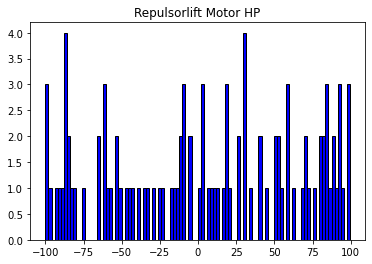

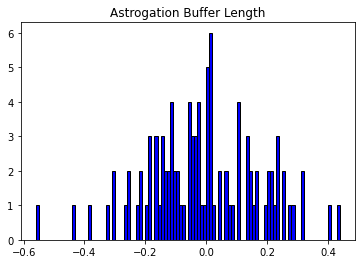

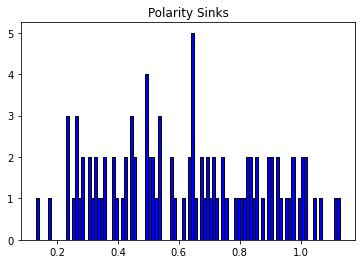

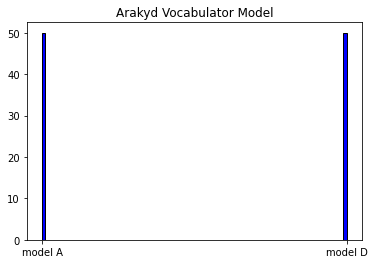

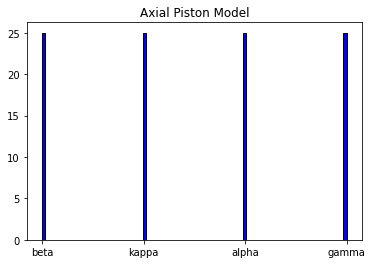

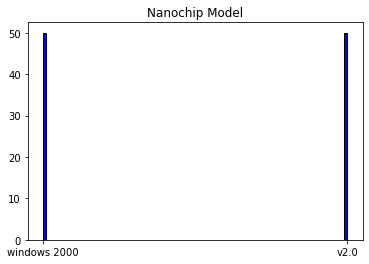

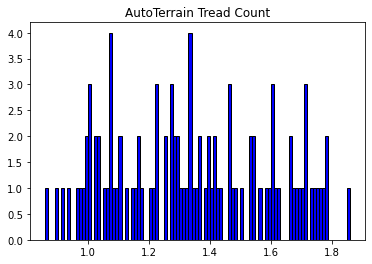

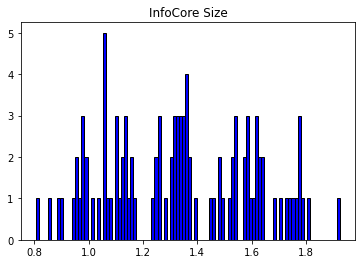

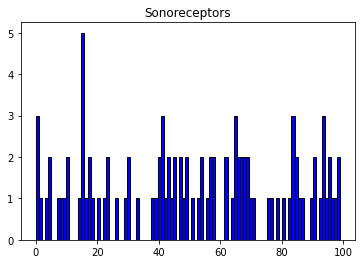

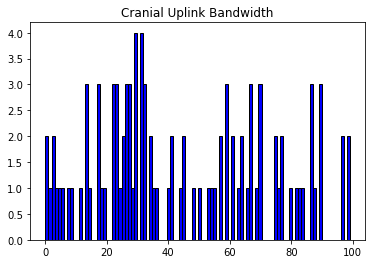

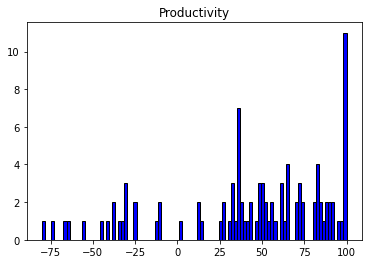

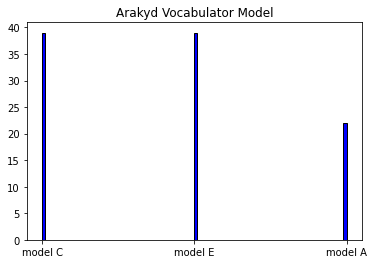

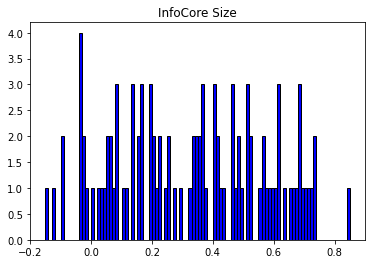

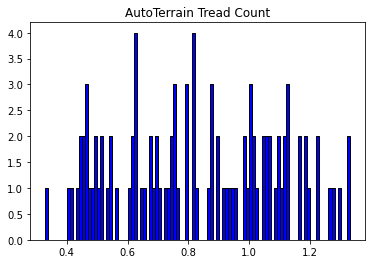

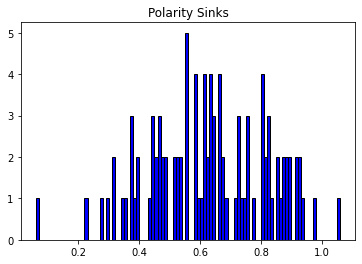

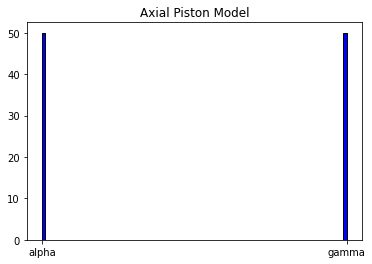

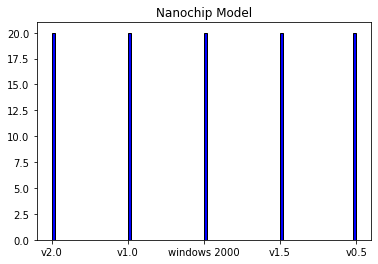

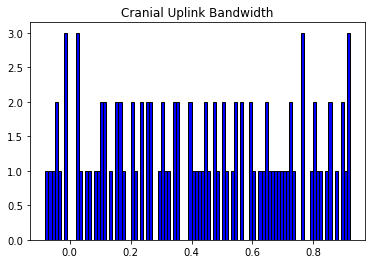

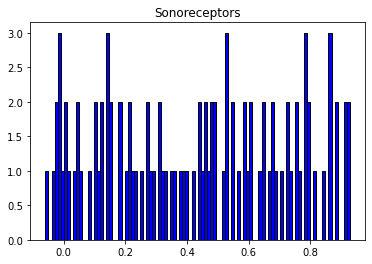

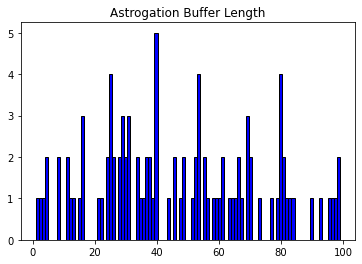

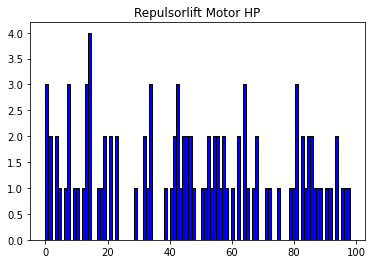

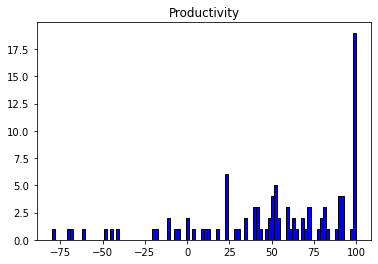

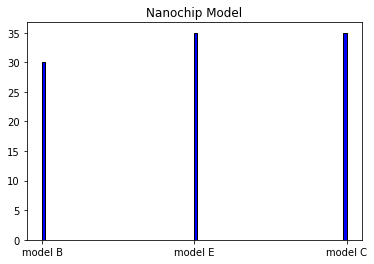

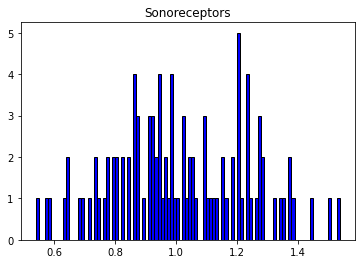

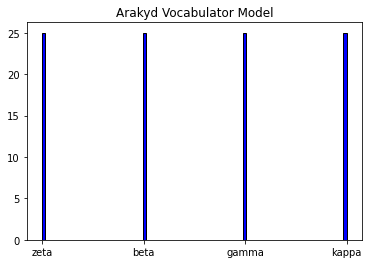

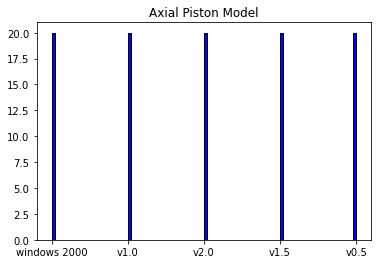

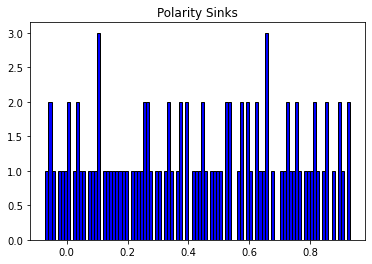

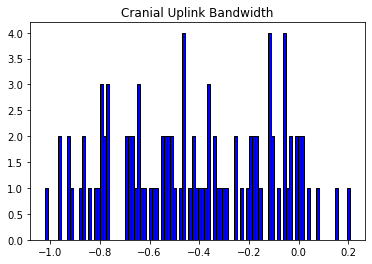

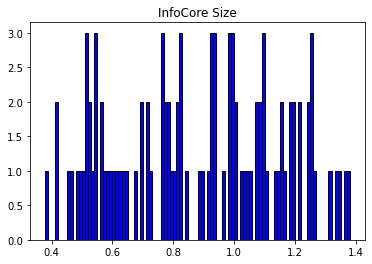

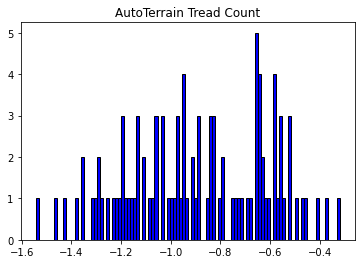

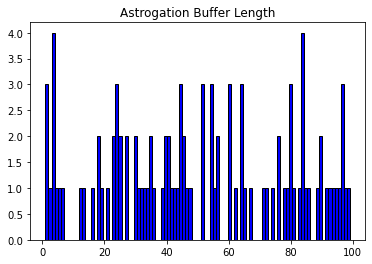

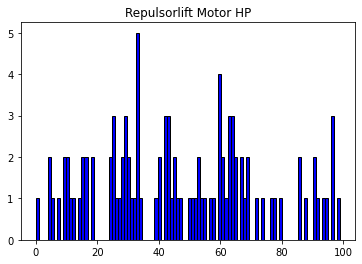

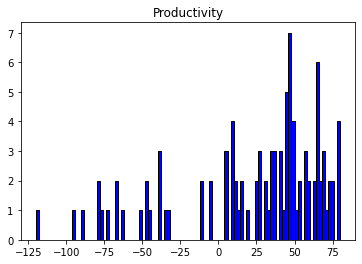

In [274]:
ex1_X, ex1_Y = productivity_data(ex1)
ex2_X, ex2_Y = productivity_data(ex2)
ex3_X, ex3_Y = productivity_data(ex3)
class_Y1 = [1 if x > 0 else 0 for x in ex1_Y] 
class_Y2 = [1 if x > 0 else 0 for x in ex2_Y] 
class_Y3 = [1 if x > 0 else 0 for x in ex3_Y] 

In [277]:
GNB1 = GaussianNB().fit(ex1_X[:, [5, 6]], class_Y1)
GNB2 = GaussianNB().fit(ex2_X[:, [5, 6]], class_Y2)
GNB3 = GaussianNB().fit(ex3_X[:, [5, 6]], class_Y3)
pred1_2 = GNB1.predict(ex2_X[:, [5, 6]])
pred1_3 = GNB1.predict(ex3_X[:, [5, 6]])
pred2_1 = GNB2.predict(ex1_X[:, [5, 6]])
pred2_3 = GNB2.predict(ex3_X[:, [5, 6]])
pred3_1 = GNB3.predict(ex1_X[:, [5, 6]])
pred3_2 = GNB3.predict(ex2_X[:, [5, 6]])

In [279]:
confusion_matrix(pred1_2, class_Y2)

array([[12,  0],
       [ 2, 86]])

In [280]:
confusion_matrix(pred1_3, class_Y3)

array([[19,  0],
       [ 4, 77]])

In [293]:
confusion_matrix(pred2_1, class_Y1)

array([[12,  0],
       [ 7, 81]])

In [294]:
confusion_matrix(pred2_3, class_Y3)

array([[10,  0],
       [13, 77]])

In [296]:
confusion_matrix(pred3_1, class_Y1)

array([[19,  1],
       [ 0, 80]])

In [297]:
confusion_matrix(pred3_2, class_Y2)

array([[10,  1],
       [ 4, 85]])

## 

In [330]:
proba1_2 = GNB1.predict_proba(ex2_X[:, [5, 6]])
proba1_3 = GNB1.predict_proba(ex3_X[:, [5, 6]])
proba2_1 = GNB2.predict_proba(ex1_X[:, [5, 6]])
proba2_3 = GNB2.predict_proba(ex3_X[:, [5, 6]])
proba3_1 = GNB3.predict_proba(ex1_X[:, [5, 6]])
proba3_2 = GNB3.predict_proba(ex2_X[:, [5, 6]])

In [337]:
proba_tree = DecisionTreeClassifier(class_weight={0:2, 1:1}, max_depth=2, random_state=0).fit(proba2_3, class_Y3)
tree_pred = proba_tree.predict(proba2_3)
confusion_matrix(tree_pred, class_Y3)

array([[22, 11],
       [ 1, 66]])

In [338]:
tree_pred_1_2 = proba_tree.predict(proba1_2)
confusion_matrix(tree_pred_1_2, class_Y2)

array([[14, 29],
       [ 0, 57]])

In [339]:
tree_pred_1_3 = proba_tree.predict(proba1_3)
confusion_matrix(tree_pred_1_3, class_Y3)

array([[23, 19],
       [ 0, 58]])

In [340]:
tree_pred_2_1 = proba_tree.predict(proba2_1)
confusion_matrix(tree_pred_2_1, class_Y1)

array([[19, 15],
       [ 0, 66]])

In [341]:
tree_pred_3_1 = proba_tree.predict(proba3_1)
confusion_matrix(tree_pred_3_1, class_Y1)

array([[19, 34],
       [ 0, 47]])

In [342]:
tree_pred_3_2 = proba_tree.predict(proba3_2)
confusion_matrix(tree_pred_3_2, class_Y2)

array([[14, 34],
       [ 0, 52]])